# Polynomial Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-08-02 04:36:30--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

100%[======================================>] 72,629      --.-K/s   in 0.1s    

2019-08-02 04:36:31 (476 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [4]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
rdf = df[['ENGINESIZE','CO2EMISSIONS']]
rdf.head(9)

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
5,3.5,230
6,3.5,232
7,3.7,255
8,3.7,267


In [10]:
msk = np.random.rand(len(rdf))>0.8
train = rdf[msk]
test = rdf[~msk]

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']]) 
train_y = np.asanyarray(train[['CO2EMISSIONS']]) 
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
train_x1 = PolynomialFeatures(degree=3).fit_transform(train_x)

In [15]:
clf = linear_model.LinearRegression()
train_y_=clf.fit(train_x1,train_y)
print("Coefficient = " + str(clf.coef_))

Coefficient = [[ 0.         37.02095469  3.00116299 -0.388748  ]]


Text(0, 0.5, 'Emission')

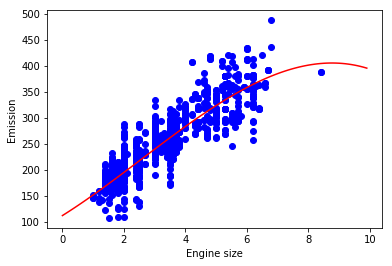

In [17]:
plt.scatter(rdf['ENGINESIZE'],rdf['CO2EMISSIONS'],color = "blue")
XX = np.arange(0.0,10.0,0.1)
plt.plot(XX,clf.intercept_[0]+clf.coef_[0][1]*XX+clf.coef_[0][2]*np.power(XX,2)+clf.coef_[0][3]*np.power(XX,3),'-r')
plt.xlabel("Engine size") 
plt.ylabel("Emission")


In [18]:
from sklearn.metrics import r2_score 
test_x_poly = PolynomialFeatures(degree=3).fit_transform(test_x)
test_y_ = clf.predict(test_x_poly) 
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y))) 
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2)) 
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )


Mean absolute error: 23.23
Residual sum of squares (MSE): 902.98
R2-score: 0.73
